In [1]:
from utils import *
from modules import *
import numpy as np 
import pandas as pd
from PIL import Image
import os
from os import listdir
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

## Lineaire

In [2]:
# definir un jeu de données lineairement separable 
seed = 42
np.random.seed(seed)
pos_cen = (-12, -12)
pos_sig = [[1, 4], [4, 1]]

neg_cen = (-2, -2)
neg_sig = [[1, 5], [4, 1]]
data,labels = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
labels = labels.reshape(-1,1)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3021.50it/s]


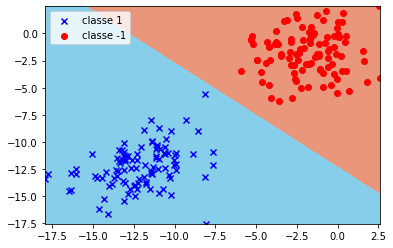

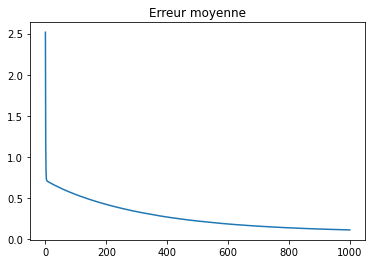

Accuracy  :  1.0


In [3]:
# definir un reseau linaire
facteur_norma = 0.4
plage_biais = (0,1)
neuro_i = 2
neuro_o = 1
batch_size = 50
epochs = 1000

lineaire = ModuleLineaire(neuro_i,neuro_o,plage_biais,facteur_norma,init=1)
mseloss = MSELoss()
network_layers = [lineaire]
network = Sequentiel(network_layers)

opti = Optim(network,mseloss,1e-5)
opti.SGD(data,labels,batch_size,epochs)
opti.affichage(data,labels)

## Non lineaire

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 455.75it/s]


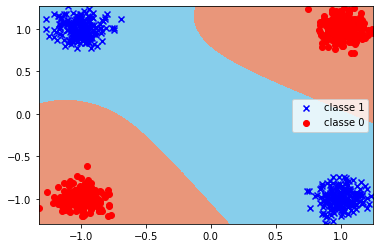

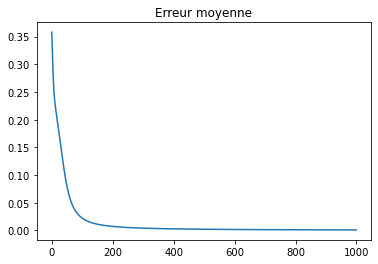

Accuracy  :  1.0


In [4]:
# definir un jeu de données XOR

seed = 42
np.random.seed(seed)
data_xor , labels_xor = create_XOR(200,0.01)


neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 1000


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()


network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
network = Sequentiel(network_layers)


opti = Optim(network,mseloss,1e-3)
opti.SGD(data_xor,labels_xor,batch_size,epochs)
opti.affichage(data_xor,labels_xor)

## Multi Classe

In [4]:
import pickle as pkl
data = pkl.load(open("data/usps.pkl",'rb'))

X_train = data["X_train"]
Y_train = data["Y_train"]
X_test = data["X_test"]
Y_test = data["Y_test"]

In [6]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 120
neuro_i_2 = 120
neuro_o_2 = 60
neuro_i_3 = 60
neuro_o_3 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 50


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3 = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()
CE = CrossEntropieLoss(nb_classes)
softmax = SoftMax()


network_layers = [lineaire_1,TanH,lineaire_2,TanH,lineaire_3,softmax]
network = Sequentiel(network_layers)

opti = Optim(network,CE,1e-3)
opti.SGD(X_train,Y_train,batch_size,epochs)

100%|███████████████████████████████████████████| 50/50 [00:21<00:00,  2.36it/s]


In [7]:
print("Accuracy sur le train : ",opti.getNetwork().accuracy(X_train,Y_train))
print("Accuracy sur le test : ",opti.getNetwork().accuracy(X_test,Y_test))

Accuracy sur le train :  0.934339380317868
Accuracy sur le test :  0.8419680677745194


## Auto-encodeur

In [5]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 160
neuro_i_2 = 160
neuro_o_2 = 120
neuro_i_3 = 120
neuro_o_3 = 60
neuro_i_4 = 60
neuro_o_4 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 100
epochs = 100
nb_couches = 4


facteur_norma = 0.8
lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_enc = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_enc = ModuleLineaire(neuro_i_4 ,neuro_o_4 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_dec = ModuleLineaire(neuro_o_3 ,neuro_i_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_dec = ModuleLineaire(neuro_o_4 ,neuro_i_4 ,plage_biais,facteur_norma,init=1)

TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,TanH,lineaire_2_enc,TanH,lineaire_3_enc,TanH,lineaire_4_enc,TanH,
                  lineaire_4_dec,TanH,lineaire_3_dec,TanH,lineaire_2_dec,TanH,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

opti = Optim(network,BCE,1e-4)
opti.SGD(X_train,Y_train,batch_size,epochs)

100%|█████████████████████████████████████████| 100/100 [02:42<00:00,  1.63s/it]


## Encodage d'images

In [6]:
layers_encodeur = opti.getNetwork().getModules()[:nb_couches*2]
layers_decodeur = opti.getNetwork().getModules()[nb_couches*2:]

#### Train

In [7]:
encodeur = Sequentiel(layers_encodeur)
latent_repre = encodeur.forward(X_train)

decodeur = Sequentiel(layers_decodeur)
X_train_hat =  decodeur.forward(latent_repre)

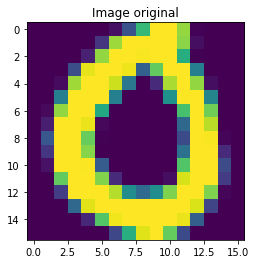

Similarité sur les images de train  :  None


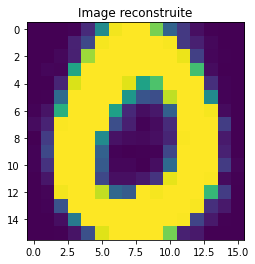

In [8]:
affiche_image(X_train,181,"Image original")
plt.show()
affiche_image(X_train_hat,181,"Image reconstruite")

# calculer l'accuracy de similarité entre l'image sortie du reseau et l'image de base
print("Similarité sur les images de train  : ",similarity(X_train_hat,X_train))

#### Test

In [9]:
encodeur = Sequentiel(layers_encodeur)
latent_repre = encodeur.forward(X_test)

decodeur = Sequentiel(layers_decodeur)
X_test_hat =  decodeur.forward(latent_repre)

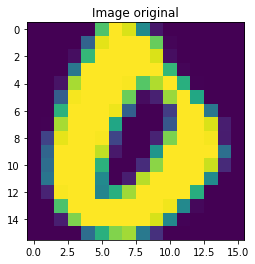

Similarité sur les images de test  :  None


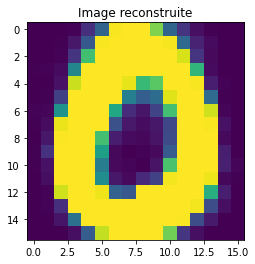

In [10]:
affiche_image(X_test,15,"Image original")
plt.show()
affiche_image(X_test_hat,15,"Image reconstruite")

# calculer l'accuracy de similarité entre l'image sortie du reseau et l'image de base
print("Similarité sur les images de test  : ",similarity(X_test_hat,X_test))

## Represenation latente et clustering

### Credit Card

In [14]:
cc_data = pd.read_csv("data/CC GENERAL.csv")

In [15]:
cc_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
cc_data = np.array(cc_data)
# supprimer la colonne 1
cc_data = cc_data[:,1:]

cc_data = cc_data.astype('float')

In [17]:
data_norm = normalisation(cc_data)
data_norm = data_norm.astype('float')
y = np.random.randint(0,1,data_norm.shape[0])

In [18]:
data_norm[:,4].std()

0.04019055964807425

In [19]:
np.random.seed(42)
n_samples = data_norm.shape[0]

neuro_i_1 = 17
neuro_o_1 = 6
neuro_i_2 = 6
neuro_o_2 = 2

plage_biais = (0,1)
batch_size = 50
epochs = 100
nb_couches = 2


facteur_norma = 0.8
lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)


TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,sigmoide,lineaire_2_enc,sigmoide,
                  lineaire_2_dec,sigmoide,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

opti = Optim(network,BCE,1e-2)
opti.SGD(data_norm,y,batch_size,epochs)

100%|█████████████████████████████████████████| 100/100 [00:05<00:00, 17.02it/s]


In [28]:
layers_encodeur = opti.getNetwork().getModules()[:nb_couches*2]
layers_decodeur = opti.getNetwork().getModules()[nb_couches*2:]

In [21]:
encodeur = Sequentiel(layers_encodeur)
latent_repre = encodeur.forward(cc_data)
latent_repre

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]])

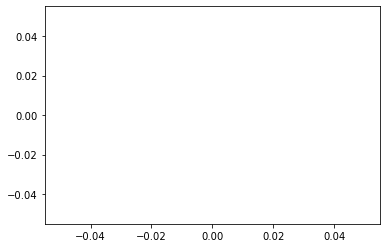

In [22]:
plt.scatter(latent_repre[:,0],latent_repre[:,1])

### USPS

In [32]:

nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 160
neuro_i_2 = 160
neuro_o_2 = 120
neuro_i_3 = 120
neuro_o_3 = 60
neuro_i_4 = 60
neuro_o_4 = 10

plage_biais = (0,1)
batch_size = 100
epochs = 100
nb_couches = 4
facteur_norma = 0.5


lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_enc = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_enc = ModuleLineaire(neuro_i_4 ,neuro_o_4 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_dec = ModuleLineaire(neuro_o_3 ,neuro_i_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_dec = ModuleLineaire(neuro_o_4 ,neuro_i_4 ,plage_biais,facteur_norma,init=1)

TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,TanH,lineaire_2_enc,TanH,lineaire_3_enc,TanH,lineaire_4_enc,TanH,
                  lineaire_4_dec,TanH,lineaire_3_dec,TanH,lineaire_2_dec,TanH,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

opti = Optim(network,BCE,1e-6)
opti.SGD(X_train,Y_train,batch_size,epochs)

100%|█████████████████████████████████████████| 100/100 [02:48<00:00,  1.68s/it]


In [34]:
layers_encodeur = opti.getNetwork().getModules()[:nb_couches*2]
layers_decodeur = opti.getNetwork().getModules()[nb_couches*2:]

encodeur = Sequentiel(layers_encodeur)
latent_repre = encodeur.forward(X_train)

decodeur = Sequentiel(layers_decodeur)
X_train_hat =  decodeur.forward(latent_repre)

In [ ]:
'''
plt.title("Qualité du clustering dans l'espace latent en fonction du learning rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.plot(scores)
plt.show()'''

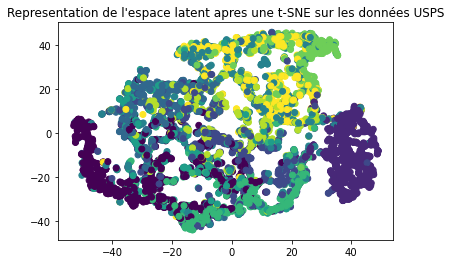

In [36]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(latent_repre)

plt.title("Representation de l'espace latent apres une t-SNE sur les données USPS")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_train)

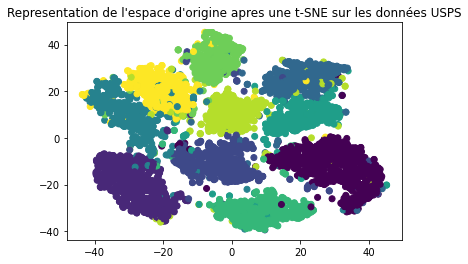

In [12]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(X_train)

plt.title("Representation de l'espace d'origine apres une t-SNE sur les données USPS")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_train)

In [31]:
kmeans = KMeans(n_clusters=10, random_state=0, max_iter=100).fit(X_train_hat)  
(kmeans.labels_ == Y_train).mean()

0.1671215283352063

## Debruitage de données

In [ ]:
seed = 42
np.random.seed(seed)
pos_cen = (-12, -12)
pos_sig = [[1, 4], [4, 1]]

neg_cen = (-2, -2)
neg_sig = [[1, 5], [4, 1]]
data,labels = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
print("Données avant bruitage")
plot2D(data,labels)

shape = data.shape
mean = 2
std = 4
noise = genrate_noise(shape,law='normal',mean,std)

data_noised = data + noise
print("Données apres bruitage")
plot2D(data_noised,labels)